In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
mobiles = pd.read_csv('MobilesDataset.csv', encoding='ISO-8859-1')

In [5]:
mobiles.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [6]:
mobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [7]:
mobiles.describe()

,Launched Year
count,930.000000
mean,2022.193548
std,1.862080
min,2014.000000
25%,2021.000000
50%,2023.000000
75%,2024.000000
max,2025.000000


In [8]:
mobiles['RAM'].unique()

array(['6GB', '8GB', '4GB', '3GB', '12GB', '2GB', '1.5GB', '16GB', '10GB',
       '1GB', '8GB / 12GB'], dtype=object)

In [10]:
mobiles['RAM'] = mobiles['RAM'].str.replace('8GB / 12GB' , '12GB').str.replace('GB','').astype(float)

In [11]:
mobiles['Battery Capacity'].value_counts()

Battery Capacity
5,000mAh    197
5000mAh      96
4,500mAh     46
4500mAh      38
5,200mAh     35
           ... 
7,500mAh      1
8,300mAh      1
8,850mAh      1
5065mAh       1
5110mAh       1
Name: count, Length: 147, dtype: int64

In [12]:
mobiles['Battery Capacity'] = mobiles['Battery Capacity'].str.replace(r'mAh|,' , '' , regex=True).astype(float)
mobiles['Battery Capacity']

0       3600.0
1       3600.0
2       3600.0
3       4200.0
4       4200.0
        ...   
925    10000.0
926    10000.0
927     4400.0
928     4400.0
929     4400.0
Name: Battery Capacity, Length: 930, dtype: float64

In [13]:
mobiles['Launched Price (USA)'] = mobiles['Launched Price (USA)'].str.extract(r'(\d+)').astype(float)

In [14]:
mobiles['Launched Price (USA)']

0       799.0
1       849.0
2       899.0
3       899.0
4       949.0
        ...  
925     280.0
926     300.0
927       1.0
928    1719.0
929       2.0
Name: Launched Price (USA), Length: 930, dtype: float64

In [15]:
mobiles['Mobile Weight'] = mobiles['Mobile Weight'].str.extract(r'(\d+)').astype(float)

In [16]:
mobiles['Screen Size'] = mobiles['Screen Size'].str.extract(r'(\d+)').astype(float)

Text(0.5, 0, 'price vs weight')

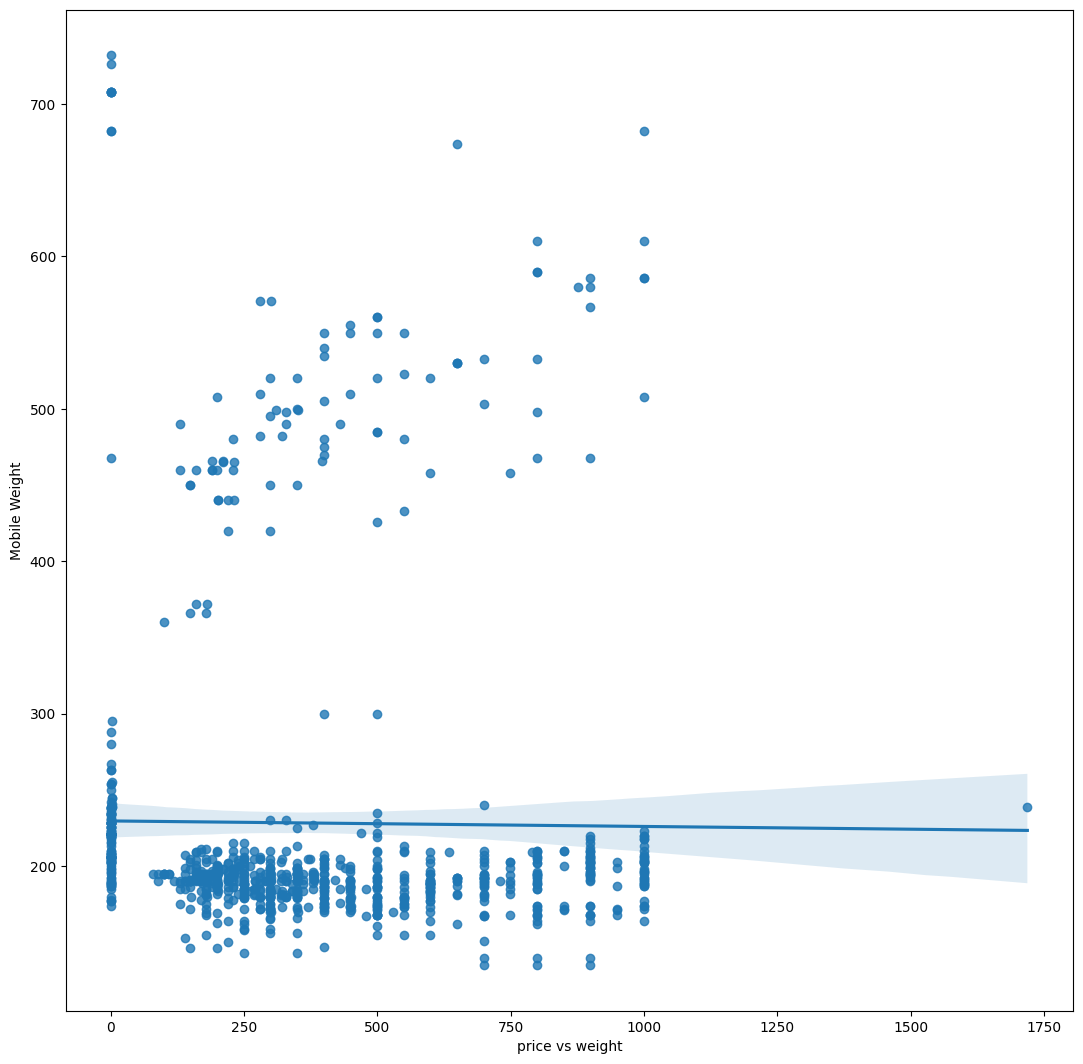

In [22]:
fig,ax= plt.subplots(figsize=(13,13))
sns.regplot(data = mobiles, x = 'Launched Price (USA)' , y= 'Mobile Weight')
plt.xlabel('price vs weight')

Text(0.5, 0, 'price vs RAM')

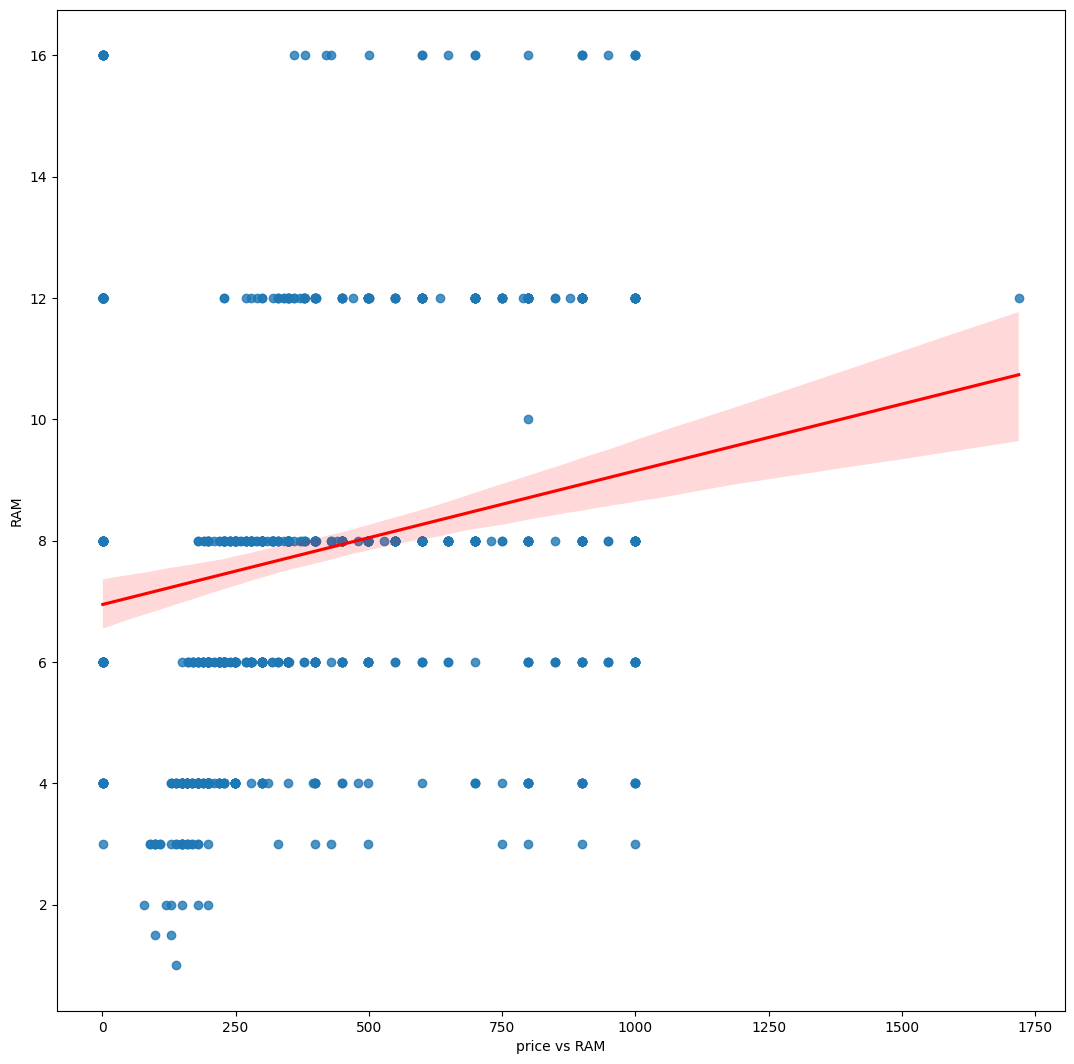

In [24]:
fig,ax= plt.subplots(figsize=(13,13))
sns.regplot(data = mobiles, x = 'Launched Price (USA)' , y= 'RAM' , line_kws={'color' : 'red'})
plt.xlabel('price vs RAM')

Text(0.5, 0, 'price vs battery')

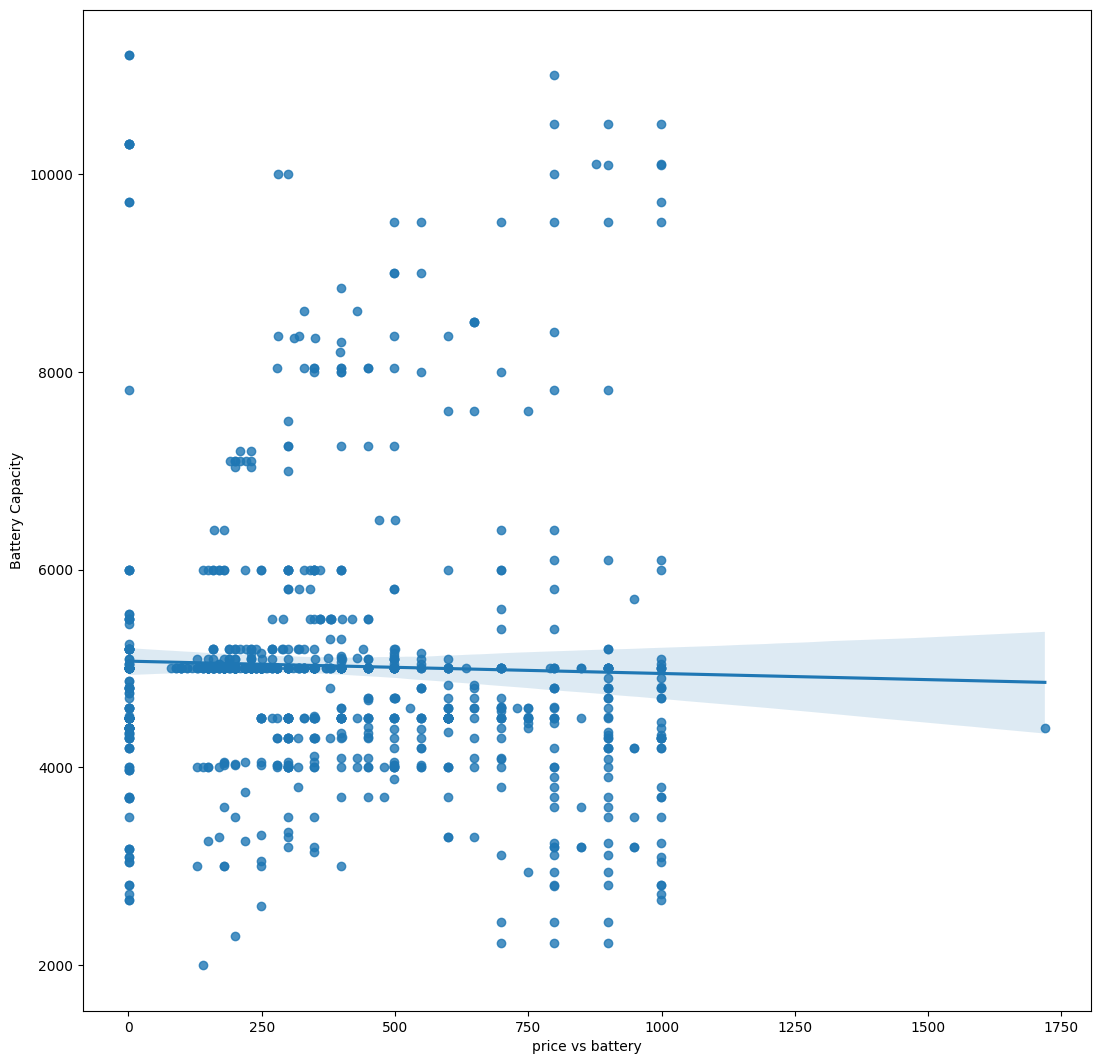

In [25]:
fig,ax= plt.subplots(figsize=(13,13))
sns.regplot(data = mobiles, x = 'Launched Price (USA)' , y= 'Battery Capacity')
plt.xlabel('price vs battery')

Text(0.5, 0, 'price vs Screen Size')

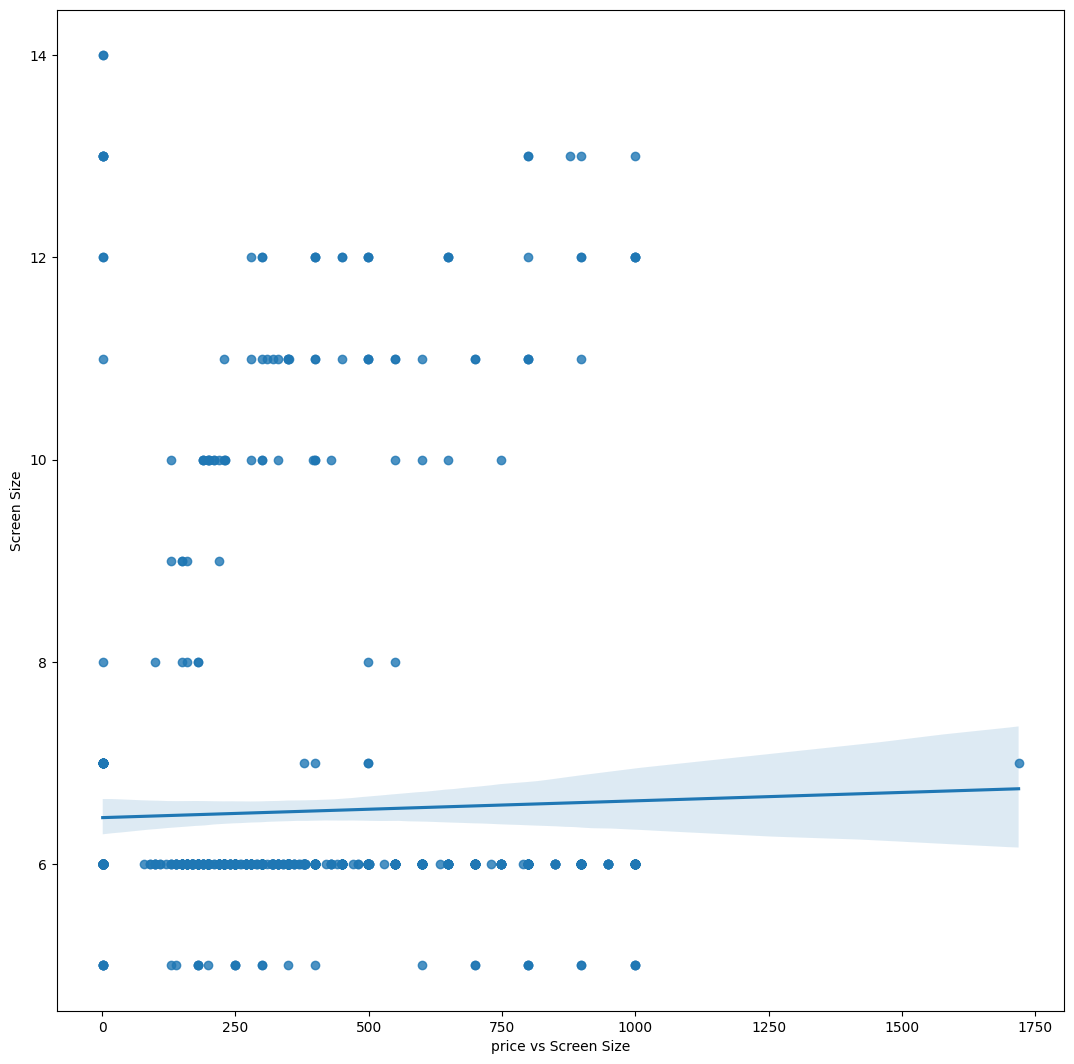

In [26]:
fig,ax= plt.subplots(figsize=(13,13))
sns.regplot(data = mobiles, x = 'Launched Price (USA)' , y= 'Screen Size')
plt.xlabel('price vs Screen Size')

In [28]:
#number of mobile phones released by each company
release_by_company = mobiles.groupby('Company Name')['Model Name'].count().reset_index()
release_by_company.rename(columns={'Model Name':'Model Count'} , inplace = True)
release_by_company = release_by_company.sort_values(by='Model Count', ascending=False)
release_by_company

,Company Name,Model Count
9,Oppo,129
0,Apple,97
2,Honor,91
13,Samsung,88
16,Vivo,86
12,Realme,69
6,Motorola,62
4,Infinix,56
8,OnePlus,53
3,Huawei,42


<Axes: title={'center': 'number of mobiles per company'}, xlabel='Company Name', ylabel='Model Count'>

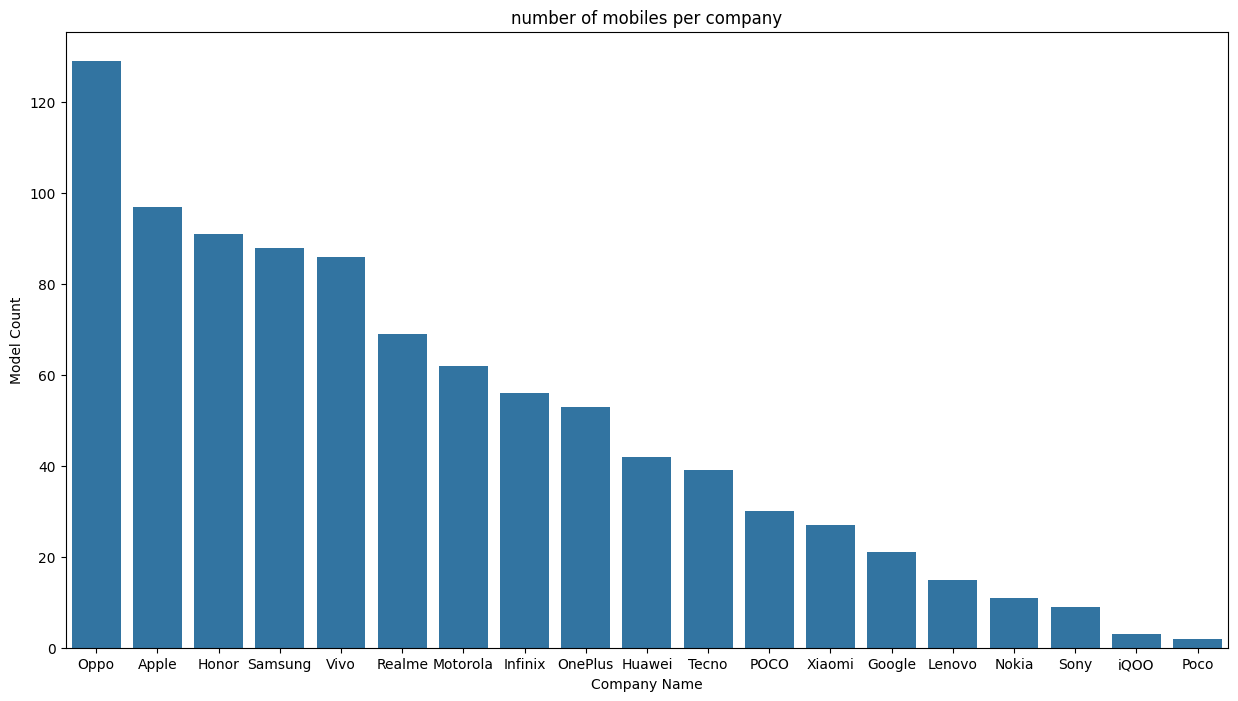

In [29]:
plt.figure(figsize = (15,8))
plt.title('number of mobiles per company')
sns.barplot(data = release_by_company , x='Company Name' , y= 'Model Count')

In [30]:
#how many phones each company has released over time for those 3 companies
df_subset = mobiles[['Launched Year' , 'Company Name']]
mobiles_over_time = release_by_company.merge(df_subset ,how = 'left' , on = 'Company Name')
mobiles_over_time = mobiles_over_time[mobiles_over_time['Company Name'].isin(['Apple', 'Honor', 'Oppo'])]
mobiles_over_time = mobiles_over_time.groupby(['Company Name' , 'Launched Year'])['Model Count'].count().reset_index()

<Axes: title={'center': 'mobiles releasing over time'}, xlabel='Launched Year', ylabel='Model Count'>

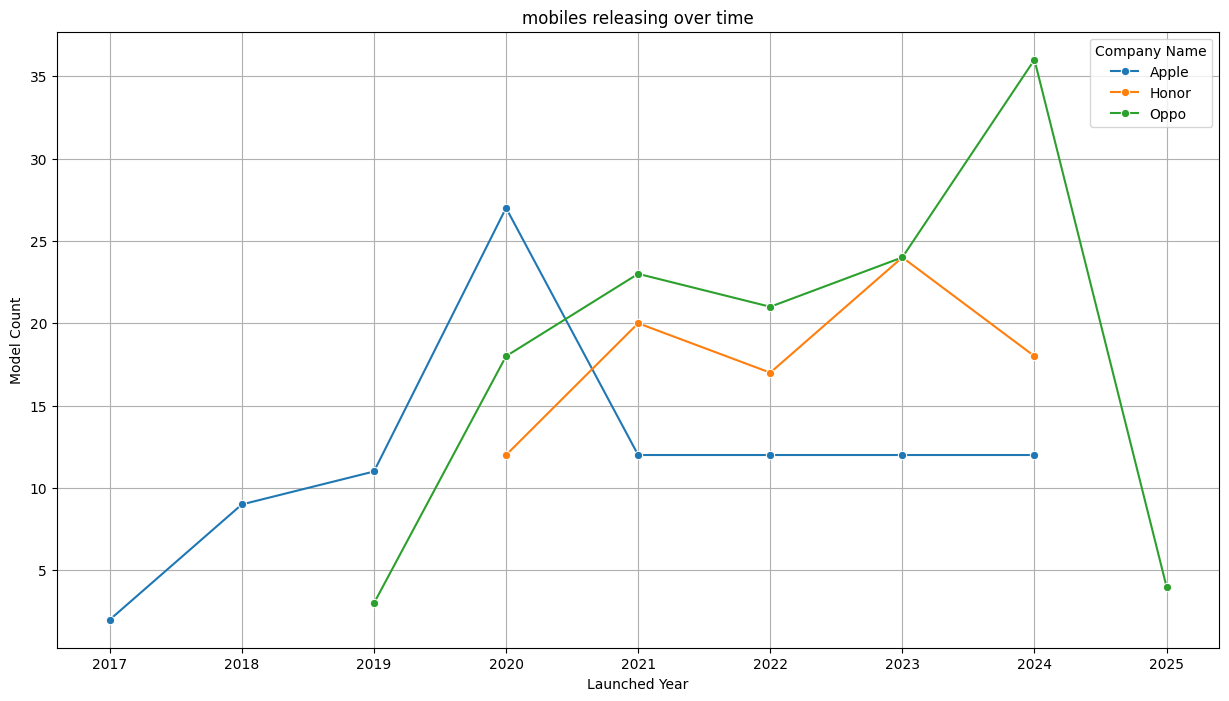

In [31]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.title('mobiles releasing over time')
sns.lineplot(data = mobiles_over_time , x='Launched Year' ,y='Model Count' , hue='Company Name' , marker = 'o')